In [56]:
import numpy as np
import os
import json
import sys
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
import matplotlib
import pandas as pd

sys.path.append("../")
import src.plot as myplot
import seaborn as sns


In [117]:
import importlib
import src.plot as myplot
importlib.reload(myplot)

<module 'src.plot' from '/Users/paulhosek/PycharmProjects/mcm/MCM_classifier/Classifier_1/0_classifier/paper_plots/../src/plot.py'>

In [5]:
samples_path = '../OUTPUT/sample_sizes/'
fname = 'MCMs_'

In [111]:
# 2. For a sample size, compute the fraction of correct members in the group of each icc
# that is get the partition map and check fraction overlap between rows in where the 1s are excluding diagonal
nr_runs = 10
digit = 0

sample_sizes = [10, 1000 ,2000,3000, 5423]
# sample_sizes = [10, 1000 ,2000,3000, 6315]

coo_sum = np.empty((5,121,121),dtype=int)
n_samples = 10
mcm_all_com = []
for s, sample_size in enumerate(sample_sizes):
    # load runs
    mcm_sample = []
    mcms_path = os.path.join(samples_path, str(sample_size), "MCMs")
    for i in range(n_samples): #len(os.listdir(mcms_path))):
        with open(os.path.join(mcms_path, fname+str(i)+ ".json")) as f:
                mcm_sample.append(json.load(f))
    mcm_0_multisample = np.array([myplot.create_cooccurance_matrix(mcm_sample[i][digit]) for i in range(nr_runs)],dtype=int)
    coo_sum[s,:,:] = np.sum(mcm_0_multisample,axis=0)
    mcm_all_com.append(mcm_sample)




Standard Deviation per Row at 5423:
[120   0  10   1  33  22 110  11   2 119 109  12  99 111   3  17  43  29
  18   5  85  62  50  15   9  21  25   8   6   7  28  55  44   4  45 117
  35  27  20  51  40 108 118  98  79  32  95  16  89  87  88  66  77  74
  39  80  68 104  36 114 102 103  90  86  46 100  24  14  26  49 107  97
  57  19  37  82  34  13  23  61  69  58  63 105 112  47  38 116 115  72
 106  31  91  54  65  76  30  41  48  59  73  71  60 113  81  70 101  67
  56  78  42  96  83  52  93  94  92  75  53  64  84]
0


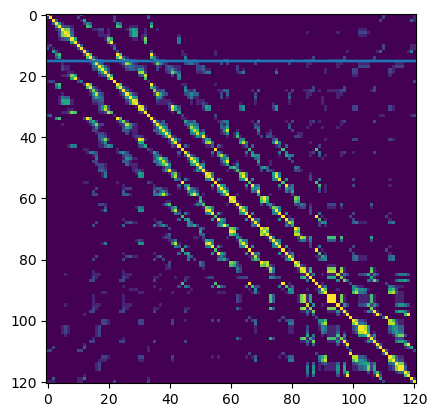

In [30]:
import numpy as np
arr = coo_sum[-1,:,:]
nodiag = arr.copy()
np.fill_diagonal(nodiag,0)
std_per_row = np.std(nodiag, axis=1)
min_per_row = np.min(nodiag, axis=1)
max_per_row = np.max(nodiag, axis=1)

print("Standard Deviation per Row at 5423:")

res = np.argsort(std_per_row)
print(res)
# print("Minimum per Row:")
print(np.argmax(min_per_row))

# print("Maximum per Row:")
# print(np.argmax(max_per_row))

plt.imshow(arr)
for i in res[:10]:
    plt.axhline(15)

 Histogram 

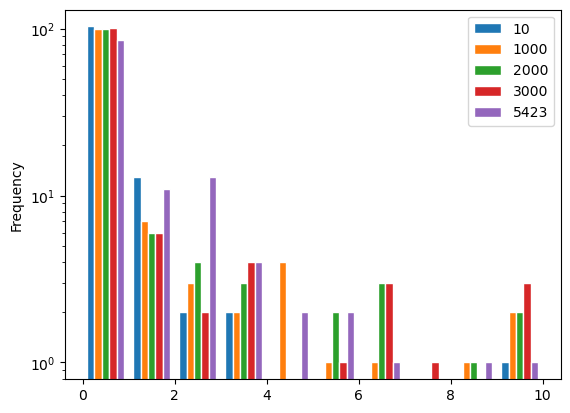

In [9]:
r = 15

cmap = matplotlib.colormaps["viridis_r"]
colors = [cmap(i) for i in np.linspace(0,1,coo_sum.shape[0])]

fig, ax = plt.subplots()

# [coo_sum[i, r, :] > 0]
res = [coo_sum[i, r, :] for i in range(coo_sum[:, r, :].shape[0])]

ax.hist(res,alpha=1,edgecolor="white", linewidth=1, stacked=False, density=False) #, color=colors[ss],histtype="barstacked", bins=10)
ax.set_xlabel("")
ax.set_yscale("log")

# ax.set_xscale("log")
ax.set_ylabel("Frequency")
legend_dict = {sample_sizes[i]:c for i,c in enumerate(colors)}
ax.legend(legend_dict)
plt.show()


Just take row and show

In [47]:
np.argsort(std_per_row) # first = smallest std


array([120,   0,  10,   1,  33,  22, 110,  11,   2, 119, 109,  12,  99,
       111,   3,  17,  43,  29,  18,   5,  85,  62,  50,  15,   9,  21,
        25,   8,   6,   7,  28,  55,  44,   4,  45, 117,  35,  27,  20,
        51,  40, 108, 118,  98,  79,  32,  95,  16,  89,  87,  88,  66,
        77,  74,  39,  80,  68, 104,  36, 114, 102, 103,  90,  86,  46,
       100,  24,  14,  26,  49, 107,  97,  57,  19,  37,  82,  34,  13,
        23,  61,  69,  58,  63, 105, 112,  47,  38, 116, 115,  72, 106,
        31,  91,  54,  65,  76,  30,  41,  48,  59,  73,  71,  60, 113,
        81,  70, 101,  67,  56,  78,  42,  96,  83,  52,  93,  94,  92,
        75,  53,  64,  84])

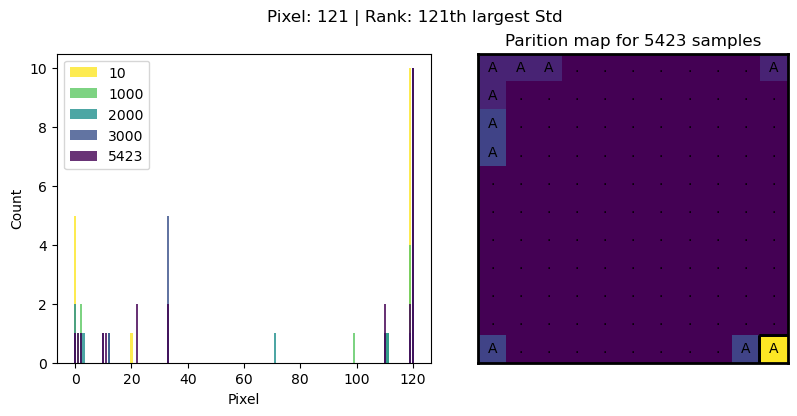

In [131]:
sorted_rows = np.argsort(std_per_row)[::-1]
i = 120
r = sorted_rows[i]

cmap = matplotlib.colormaps["viridis_r"]
colors = [cmap(i) for i in np.linspace(0,1,coo_sum.shape[0])]
scale = .7
fig, axs = plt.subplots(1,2,figsize=(12*scale,6*scale))

# [coo_sum[i, r, :] > 0]
res = [coo_sum[i, r, :].copy() for i in range(coo_sum[:, r, :].shape[0])]

# hist
legend_dict = {sample_sizes[i]:c for i,c in enumerate(colors)}
fig.suptitle(f"Pixel: {r+1} | Rank: {i+1}th largest Std")
for i, sample in enumerate(res):
    # sample[r] = 0
    axs[0].bar(range(len(sample)), sample,color=colors[i], alpha=.8)
    axs[0].set_xlabel('Pixel')
    axs[0].set_ylabel('Count')
axs[0].legend(legend_dict)

# parition map
myplot.interesting_pix_map(mcm_all_com[i], [r], nr_runs, digit=0,ax = axs[1],map_kwargs={"cbar":None})
axs[1].set_title("Parition map for 5423 samples")
plt.tight_layout()
plt.show()


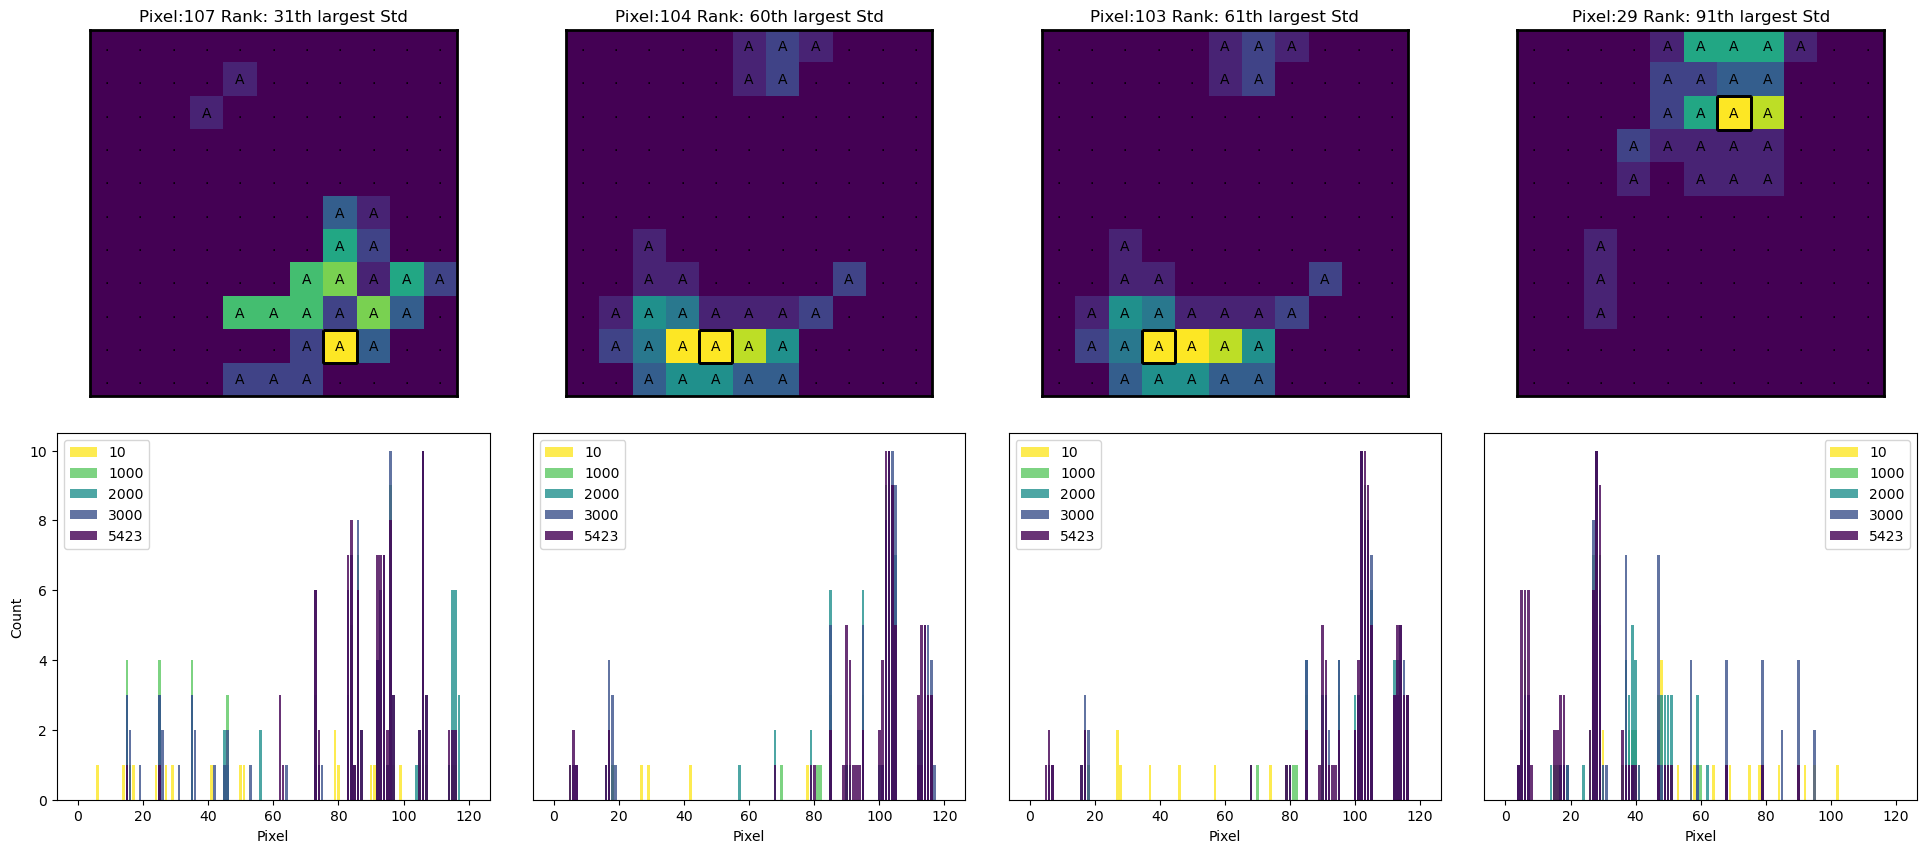

In [150]:
digit = 0

sorted_rows = np.argsort(std_per_row)[::-1]
# ix_sel = [0,1,119,120]
ix_sel = [30,59,60,90]

interesting_pix = [sorted_rows[i] for i in ix_sel]

scale = 2
fig, axs = plt.subplots(2, 4, figsize=(scale*12, scale*5), gridspec_kw = {'wspace':0.1, 'hspace':0.1})


axs = axs.flatten()

for i, ax in enumerate(axs[:4]): 
    myplot.interesting_pix_map(mcm_all_com[-1], [interesting_pix[i]], nr_runs, digit=0,ax = ax,map_kwargs={"cbar":None})
    ax.set_title(f'Pixel:{interesting_pix[i]+1} Rank: {ix_sel[i]+1}th largest Std') # fill rank in here


for i, ax in enumerate(axs[4:]):
    r = interesting_pix[i]
    res = [coo_sum[i, r, :].copy() for i in range(coo_sum[:, r, :].shape[0])]

    for j, sample in enumerate(res):
        # sample[r] = 0
        ax.bar(range(len(sample)), sample,color=colors[j], alpha=.8)
        
        ax.set_xlabel('Pixel')

    
    if i == 0:
        ax.set_ylabel('Count')
    else:
        ax.get_yaxis().set_visible(False)

    ax.legend(legend_dict)




Paritionmap ranking pixels by their std

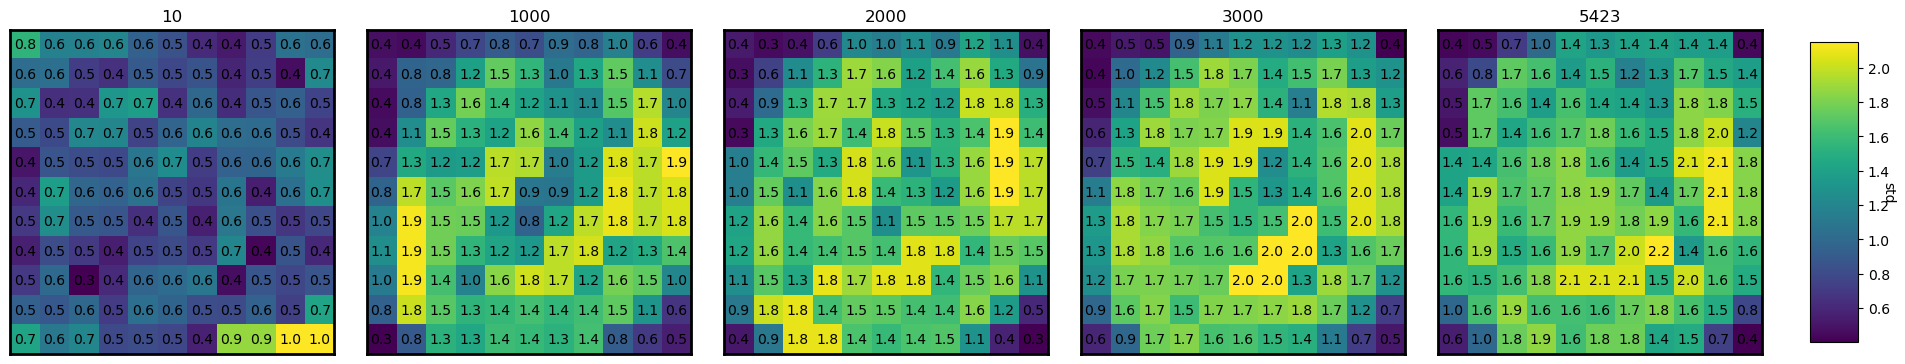

In [189]:
sample_sizes

scale = 2
fig, axs = plt.subplots(1, 5, figsize=(scale*12, scale*5), gridspec_kw = {'wspace':0.1, 'hspace':0.1})

for i,v in enumerate(sample_sizes):
    arr = coo_sum[i,:,:]
    nodiag = arr.copy()
    np.fill_diagonal(nodiag,0)
    std_per_row = np.std(nodiag, axis=1)
    sorted_rows = np.argsort(std_per_row)[::-1]

    ax = axs[i]
    ax.set_title(v)
    im = myplot.partition_map(ax, std_per_row.reshape((11,11)),std_per_row.reshape((11,11)).round(1), None,cmap="viridis", normalise=False, cbar = False)
    if i == len(sample_sizes)-1:
        fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.83,
                    wspace=0.02, hspace=0.02)
        cbar_ax = fig.add_axes([0.85, 0.35, 0.02, 0.3])
        cbar = fig.colorbar(im, cax=cbar_ax)   

        cbar.set_label('std', rotation=270)
# plt.suptitle("Rank of pixel by std. Larger = lower std")



[[[['0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000011',
    '0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001100',
    '0000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000010000',
    '0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001100000',
    '0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000110000000',
    '0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000011000000000',
    '0000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000100000000000',
    '00000000000001000000000000000000000000000000000000000000000000000000000000000000000000010000

In [91]:
res[0]

array([ 5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       10,  0])